### Notebook for the integration benchmark with the `scIB` package 

- **Developed by:** Anna Maguza
- **Institute of Computational Biology - Computational Health Department - Helmholtz Munich**
- 11th April 2022

### Load required modules

In [1]:
from scvi_colab import install

In [2]:
import anndata as an
import scanpy as sc
import scvi
from rich import print
import scib
import scib.metrics
from scvi.model.utils import mde

Global seed set to 0
/Users/anna.maguza/miniconda3/envs/scib_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as snsll

from umap import UMAP
import warnings; warnings.simplefilter('ignore')

/Users/anna.maguza/miniconda3/envs/scib_env/lib/python3.9/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [4]:
from scib_metrics.benchmark import Benchmarker

In [5]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.9.0
scanpy      1.9.3
-----
PIL                         9.5.0
absl                        NA
appnope                     0.1.2
asttokens                   NA
attr                        22.2.0
backcall                    0.2.0
certifi                     2022.12.07
charset_normalizer          3.1.0
chex                        0.1.7
comm                        0.1.2
contextlib2                 NA
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
deprecated                  1.2.13
docrep                      0.3.2
dot_parser                  NA
etils                       1.2.0
executing                   0.8.3
flax                        0.6.8
fsspec                      2023.4.0
h5py                        3.8.0
idna                        3.4
igraph                      0.10.4
importlib_resources         NA
ipykernel                   6.19.2
jax    

# 5000 HVGs + Sample batch

### Read datasets

In [6]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Predicted_stem_cells/stem_cells_and_Kong_labels_prediction_5K_HVG_Sample_batch.h5ad'
output = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Predicted_stem_cells/stem_cells_and_Kong_labels_prediction_5K_HVG_Sample_batch_output.h5ad'
adata = sc.read_h5ad(input)

In [7]:
bm = Benchmarker(
    adata,
    batch_key="Donor_ID",
    label_key="C_scANVI",
    embedding_obsm_keys=["X_pca", "X_scVI", "X_scANVI"],
    n_jobs=-1,
)
bm.benchmark()

computing PCA
    with n_comps=50
    finished (0:00:15)


Embeddings: 100%|██████████| 3/3 [05:53<00:00, 117.70s/it]


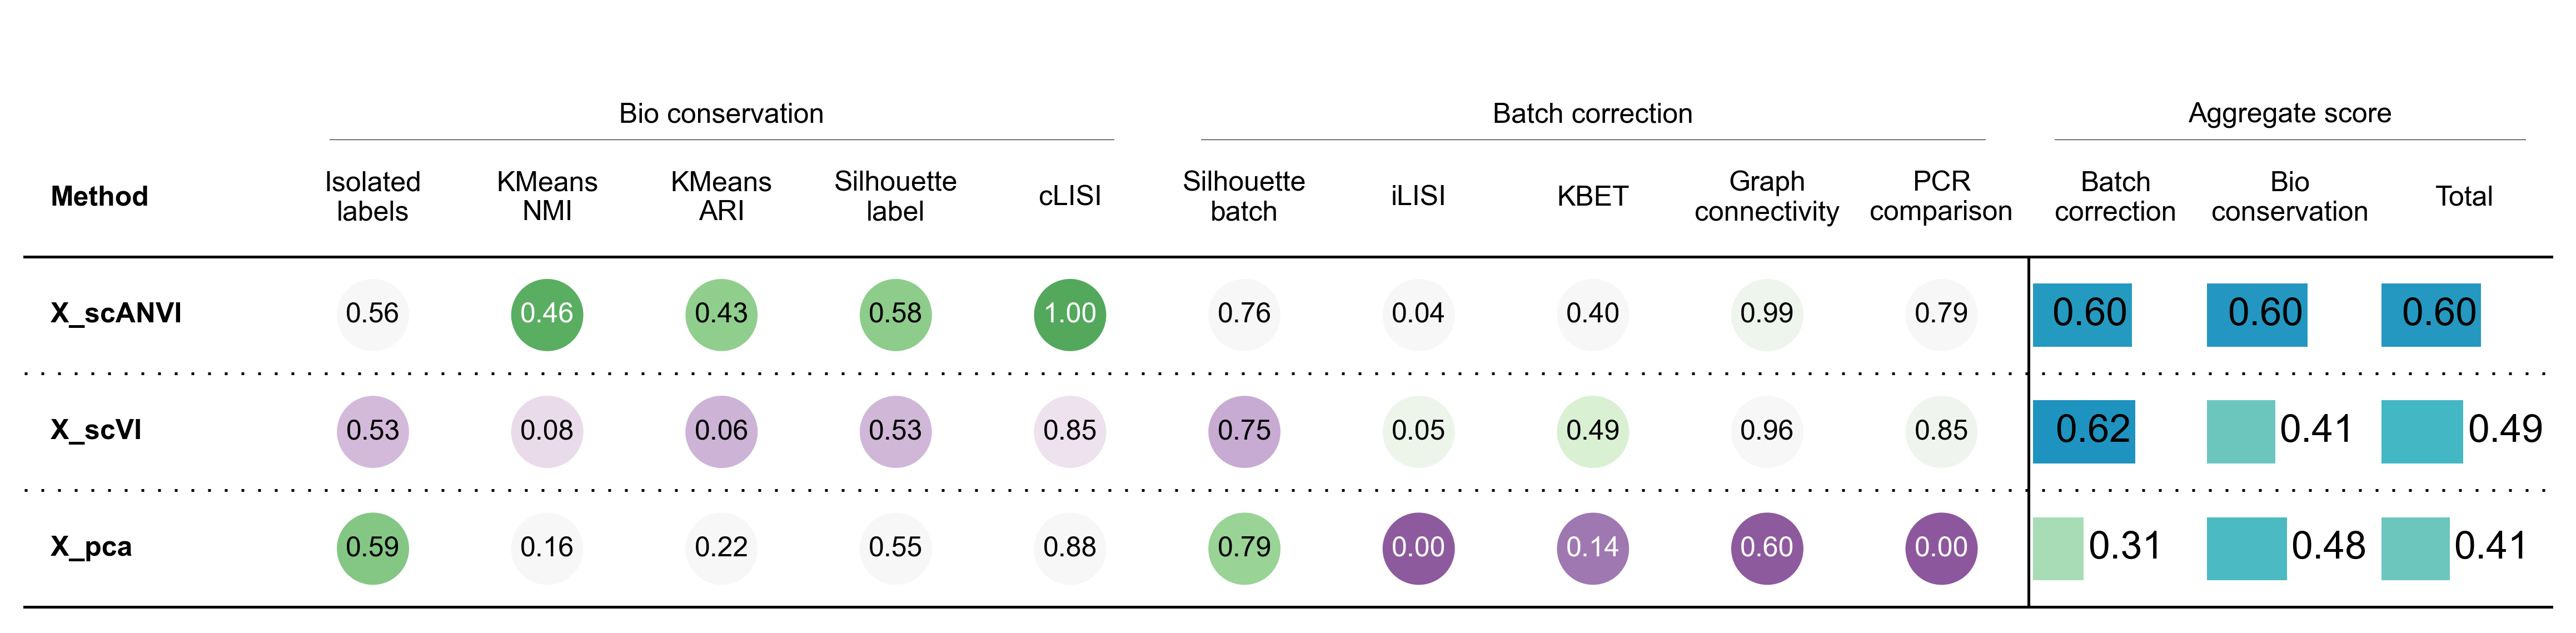

In [8]:
bm.plot_results_table(min_max_scale=False)

In [10]:
df = bm.get_results(min_max_scale=False)
print(df)

Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                           
X_pca                0.593867          0.164169          0.218553   
X_scVI               0.533129           0.08339          0.060761   
X_scANVI             0.556641          0.457936          0.428478   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

             Silhouette label             cLISI  Silhouette batch  \
Embedding                                                           
X_pca                0.546466          0.875597          0.786956   
X_scVI               0.525775           0.85173          0.745351   
X_scANVI             0.576073          0.997121          0.764484   
Metric Type  Bio conservation  Bio conservation  Batch correction   

                        iLISI              KBET Graph connectivity  \
Embedding                                                            
X_pca                0.000548          0.142204           0.603381   
X_scVI               0.046397          0.491118           0.955755   
X_scANVI             0.042299          0.399608           0.986538   
Metric Type  Batch correction  Batch correction   Batch correction   

               PCR comparison Batch correction Bio conservation  \
Embedding                                                         
X_pca                     0.0         0.306618          0.47973   
X_scVI               0.850175         0.617759         0.410957   
X_scANVI             0.792661         0.597118          0.60325   
Metric Type  Batch correction  Aggregate score  Aggregate score   

                       Total  
Embedding                     
X_pca               0.410485  
X_scVI              0.493678  
X_scANVI            0.600797  
Metric Type  Aggregate score

# 5000 HVGs + Donor batch

In [11]:
input2 = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Predicted_stem_cells/stem_cells_and_Kong_labels_prediction_5K_HVG_Donor_batch.h5ad'
output2 = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Predicted_stem_cells/stem_cells_and_Kong_labels_prediction_5K_HVG_Donor_batch_output.h5ad'
adata2 = sc.read_h5ad(input2)

In [12]:
bm2 = Benchmarker(
    adata2,
    batch_key="Donor_ID",
    label_key="C_scANVI",
    embedding_obsm_keys=["X_pca", "X_scVI", "X_scANVI"],
    n_jobs=-1,
)
bm2.benchmark()

computing PCA
    with n_comps=50
    finished (0:00:09)


Embeddings: 100%|██████████| 3/3 [03:30<00:00, 70.12s/it]


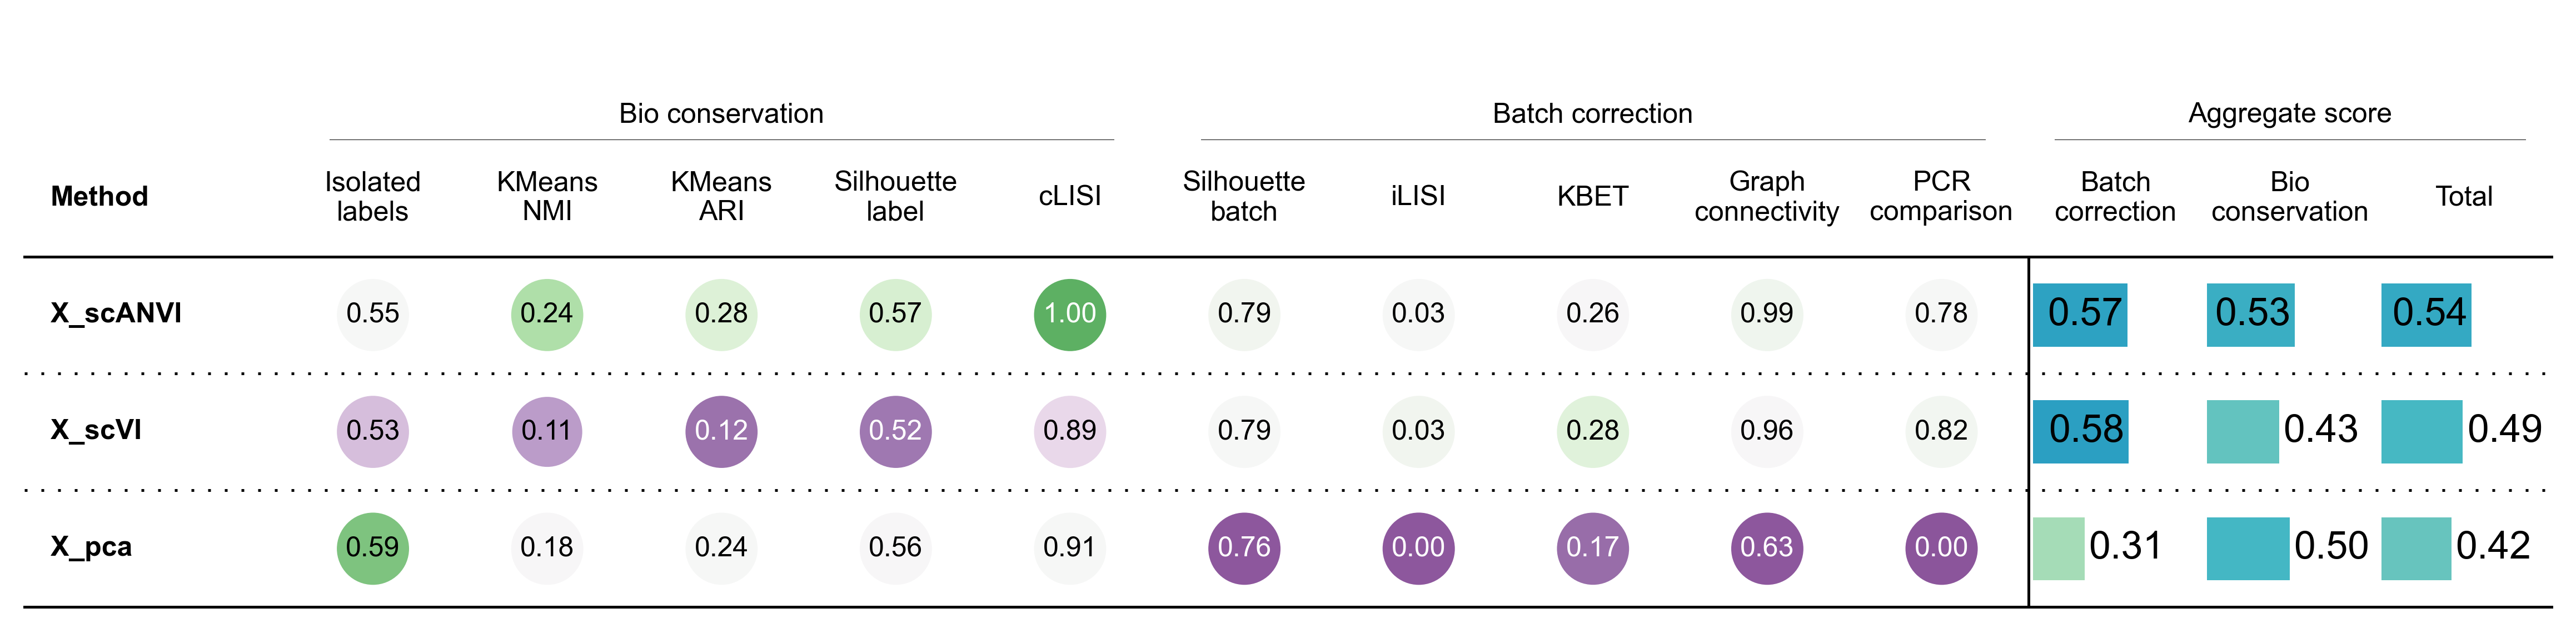

In [13]:
bm2.plot_results_table(min_max_scale=False)

In [14]:
df2 = bm2.get_results(min_max_scale=False)
print(df2)

Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                           
X_pca                0.591733          0.181688          0.238239   
X_scVI               0.525683          0.111411          0.115069   
X_scANVI             0.549878          0.241021           0.27538   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

             Silhouette label             cLISI  Silhouette batch  \
Embedding                                                           
X_pca                0.555471          0.912409           0.76389   
X_scVI               0.522685          0.886963          0.791504   
X_scANVI             0.567593          0.997118          0.793402   
Metric Type  Bio conservation  Bio conservation  Batch correction   

                        iLISI              KBET Graph connectivity  \
Embedding                                                            
X_pca                0.000535          0.166527            0.62561   
X_scVI               0.030835           0.28097            0.96359   
X_scANVI             0.028993          0.257835           0.987608   
Metric Type  Batch correction  Batch correction   Batch correction   

               PCR comparison Batch correction Bio conservation  \
Embedding                                                         
X_pca                     0.0         0.311312         0.495908   
X_scVI               0.818231         0.577026         0.432362   
X_scANVI             0.780923         0.569752         0.526198   
Metric Type  Batch correction  Aggregate score  Aggregate score   

                       Total  
Embedding                     
X_pca                0.42207  
X_scVI              0.490228  
X_scANVI             0.54362  
Metric Type  Aggregate score